In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [22]:
ALPHA: float = 0.05

In [7]:
df = pd.read_excel('data/Airline_Costs.xlsx')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           90 non-null     int64  
 1   Year              90 non-null     int64  
 2   Output            90 non-null     float64
 3   Fuel Price        90 non-null     int64  
 4   Load Factor       90 non-null     float64
 5   Cost (thousands)  90 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 4.3 KB


In [11]:
df.head(10)

,Airline,Year,Output,Fuel Price,Load Factor,Cost (thousands)
0,1,1,0.952757,106650,0.534487,1140640
1,1,2,0.986757,110307,0.532328,1215690
2,1,3,1.091980,110574,0.547736,1309570
3,1,4,1.175780,121974,0.540846,1511530
4,1,5,1.160170,196606,0.591167,1676730
5,1,6,1.173760,265609,0.575417,1823740
6,1,7,1.290510,263451,0.594495,2022890
7,1,8,1.390670,316411,0.597409,2314760
8,1,9,1.612730,384110,0.638522,2639160
9,1,10,1.825440,569251,0.676287,3247620


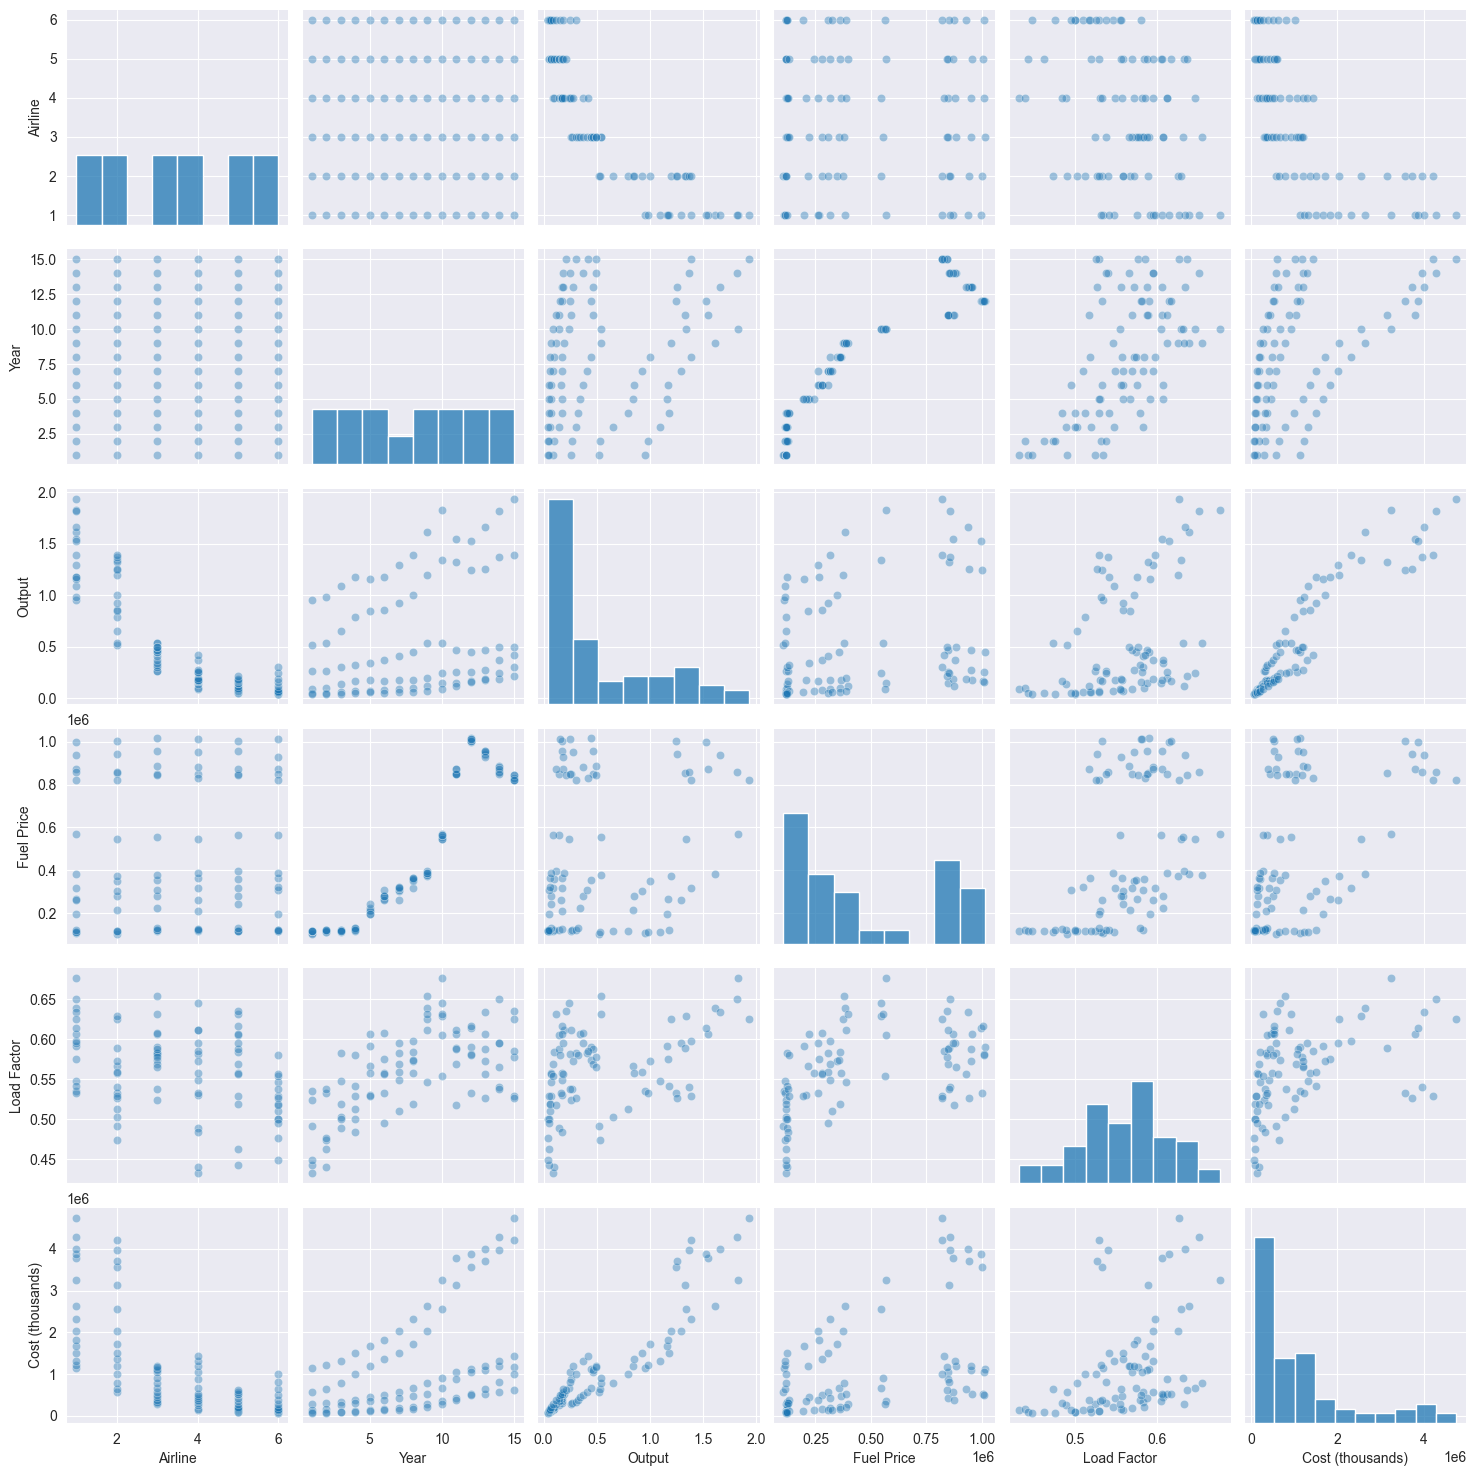

In [10]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.4})

In [12]:
X = df[['Output', 'Fuel Price', 'Load Factor']]
y = df['Cost (thousands)']

# Split into TRAIN and TEST sets (X_train/X_test are inputs, y_train/y_test are true targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Fit a model on the TRAIN split
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# The coefficients in a dataframe
cdf = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coef'])
cdf_formatted = cdf.copy()
cdf_formatted['Coef'] = cdf_formatted['Coef'].map('{:,.3f}'.format)
print(cdf_formatted)
print(cdf)

                       Coef
Output        1,958,731.337
Fuel Price            1.191
Load Factor  -2,624,538.452
                     Coef
Output       1.958731e+06
Fuel Price   1.191259e+00
Load Factor -2.624538e+06


### OLS

Ordinary Least Squares linear regression is the standard linear regression that fits a straight-line relationship by minimizing squared errors; it gives interpretable coefficients and lets us test which factors matter.

In [35]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:       Cost (thousands)   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     302.2
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           9.26e-36
Time:                        17:42:31   Log-Likelihood:                -879.13
No. Observations:                  63   AIC:                             1766.
Df Residuals:                      59   BIC:                             1775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.569e+05   4.12e+05      2.321      

### Predicting Train and Test Data

In [14]:
# Predictions on TRAIN and TEST
y_pred_train = linear_model.predict(X_train)  # model’s predictions for the TRAIN inputs
y_pred_test  = linear_model.predict(X_test)   # model’s predictions for the TEST inputs



Text(0.5, 1.0, 'Cost vs. Model Predictions')

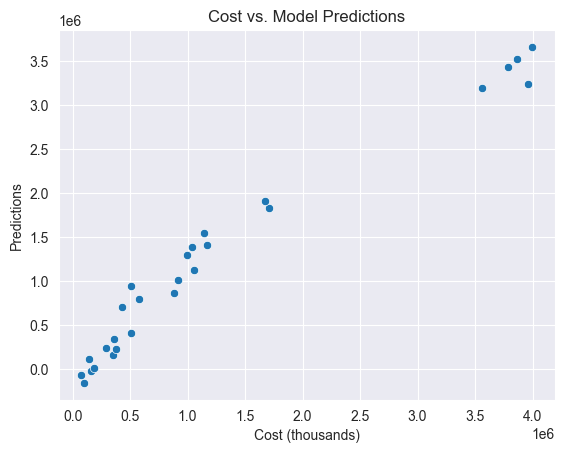

In [38]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test, y=y_pred_test)
plt.ylabel('Predictions')
plt.title('Cost vs. Model Predictions')

### Evaluation of the model

In [15]:
# Compare predictions to the corresponding true targets

# (y_train vs y_pred_train) for training diagnostics
mean_absolute_error_train = metrics.mean_absolute_error(y_train, y_pred_train)
mean_squared_error_train = np.mean((y_train - y_pred_train)**2)
root_mean_squared_error_train = np.sqrt(np.mean((y_train - y_pred_train)**2))
r2_train = metrics.r2_score(y_train, y_pred_train)

# (y_test vs y_pred_test) for generalization performance
mean_absolute_error_test = metrics.mean_absolute_error(y_test, y_pred_test)
mean_squared_error_test = metrics.mean_squared_error(y_test, y_pred_test)
root_mean_squared_error_test = np.sqrt(np.mean((y_test - y_pred_test)**2))
r2_test = metrics.r2_score(y_test, y_pred_test)

print("Training set:")
print("  y_train                             =", y_train.shape, "(true targets for training rows)")
print("  y_pred_train                        =", y_pred_train.shape, "(predicted targets for training rows)")
print("  MAE_train (Mean Absolute Error)     =", mean_absolute_error_train)
print("  MSE_train (Mean Squared Error)      =", mean_squared_error_train)
print("  RMSE_train (Root Mean Squared Error)=", root_mean_squared_error_train)
print("  R2_train                            =", r2_train)

print("\nTest set:")
print("  y_test                              =", y_test.shape, "(true targets for test rows)")
print("  y_pred_test                         =", y_pred_test.shape, "(predicted targets for test rows)")
print("  MAE_test (Mean Absolute Error)      =", mean_absolute_error_test)
print("  MSE_test (Mean Squared Error)       =", mean_squared_error_test)
print("  RMSE_test (Root Mean Squared Error) =", root_mean_squared_error_test)
print("  R2_test                             =", r2_test)

Training set:
  y_train                             = (63,) (true targets for training rows)
  y_pred_train                        = (63,) (predicted targets for training rows)
  MAE_train (Mean Absolute Error)     = 222196.5353638003
  MSE_train (Mean Squared Error)      = 77313976866.37639
  RMSE_train (Root Mean Squared Error)= 278053.91000015876
  R2_train                            = 0.9389067668671537

Test set:
  y_test                              = (27,) (true targets for test rows)
  y_pred_test                         = (27,) (predicted targets for test rows)
  MAE_test (Mean Absolute Error)      = 228921.86644817068
  MSE_test (Mean Squared Error)       = 76168674133.60332
  RMSE_test (Root Mean Squared Error) = 275986.7281838083
  R2_test                             = 0.9553838712809788


### Residuals

In [16]:
# Train Residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

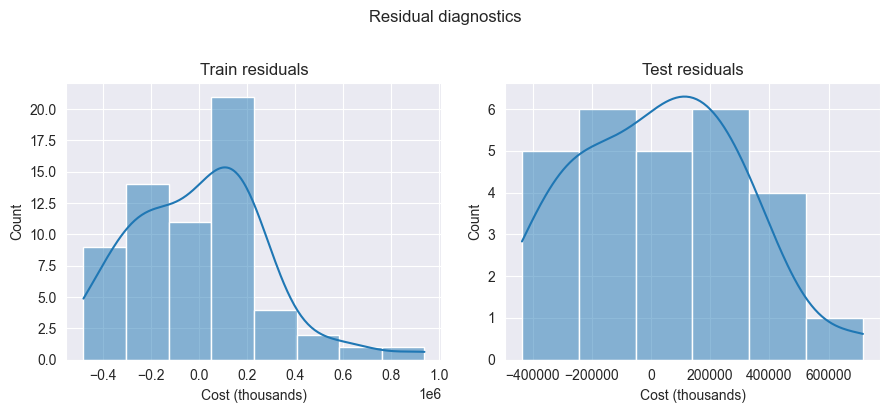

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
sns.histplot(residuals_train, ax=ax1, kde=True); ax1.set_title("Train residuals")
sns.histplot(residuals_test,  ax=ax2, kde=True); ax2.set_title("Test residuals")
fig.suptitle("Residual diagnostics", y=1.02)  # overall figure title
plt.tight_layout()

Mean_train & Mean_test =  0.0 24045.348597


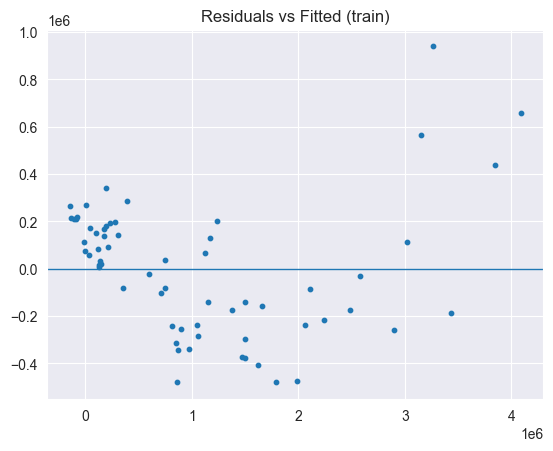

In [18]:
# Diagnostic Checklist

# Mean = 0
print('Mean_train & Mean_test = ',round(residuals_train.mean(),6), round(residuals_test.mean(),6))

# Homoscedasticity (constant variance) – residuals vs fitted should look like random fuzz (no funnel).
plt.scatter(y_pred_train, residuals_train, s=10); plt.axhline(0, lw=1)
plt.title("Residuals vs Fitted (train)"); plt.show()

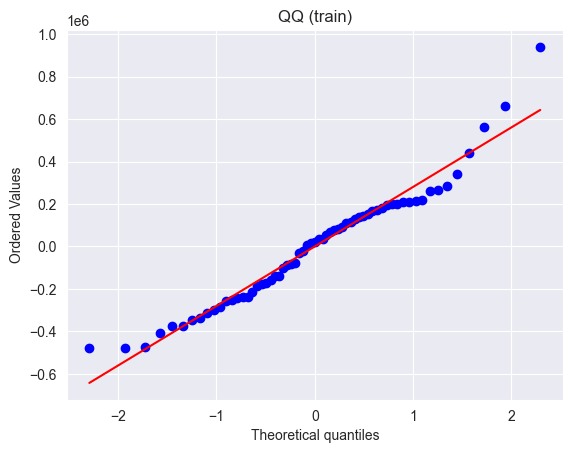

In [19]:
#QQ plot (QQ is stricter):
stats.probplot(residuals_train, dist="norm", plot=plt); plt.title("QQ (train)"); plt.show()

In [23]:
# Test Statistic (F-stat) using the TRAIN set

n = len(y_train)
p_params = X_train.shape[1] + 1                 # features + intercept

df1 = p_params - 1
df2 = n - p_params

F_statistic_overall = (r2_train / (p_params - 1)) / ((1 - r2_train) / (n - p_params))
p_value = stats.f.sf(F_statistic_overall, df1, df2)  # survival function = 1 - CDF

print('F_statistic_overall  =',F_statistic_overall)
print('p-value              =', round(p_value,5))              # ~ 0.0 (very small)
print("decision:", "REJECT H0" if p_value < ALPHA else "FAIL TO REJECT H0")

F_statistic_overall  = 302.24569020437656
p-value              = 0.0
decision: REJECT H0


### Evaluate_regression Method

In [26]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

def evaluate_regression(X_train, X_test, y_train, y_test, model, name=None):
    # Fit (assumes model is unfitted; remove fit() if you already fit)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # Metrics
    mae_tr  = mean_absolute_error(y_train, y_pred_train)
    mse_tr  = mean_squared_error(y_train, y_pred_train)
    rmse_tr = np.sqrt(mse_tr)
    r2_tr   = r2_score(y_train, y_pred_train)

    mae_te  = mean_absolute_error(y_test, y_pred_test)
    mse_te  = mean_squared_error(y_test, y_pred_test)
    rmse_te = np.sqrt(mse_te)
    r2_te   = r2_score(y_test, y_pred_test)

    # Baseline
    baseline = DummyRegressor(strategy="mean").fit(X_train, y_train)
    yb = baseline.predict(X_test)
    rmse_base = np.sqrt(mean_squared_error(y_test, yb))

    # Normalized error
    y_std = np.std(y_test, ddof=1) if len(y_test) > 1 else np.nan
    nrmse = rmse_te / y_std if y_std and not np.isnan(y_std) else np.nan

    # Gaps & lifts
    rmse_gap = (rmse_te - rmse_tr) / rmse_tr if rmse_tr != 0 else np.inf
    lift_vs_base = (rmse_base - rmse_te) / rmse_base if rmse_base != 0 else np.nan

    # Print summary
    if name: print(f"\n=== {name} ===")
    print("Train:")
    print(f"  MAE={mae_tr:.4f}  MSE={mse_tr:.4f}  RMSE={rmse_tr:.4f}  R2={r2_tr:.6f}")
    print("Test:")
    print(f"  MAE={mae_te:.4f}  MSE={mse_te:.4f}  RMSE={rmse_te:.4f}  R2={r2_te:.6f}")
    print(f"Baseline RMSE (mean predictor) = {rmse_base:.4f}")
    if not np.isnan(nrmse): print(f"nRMSE = RMSE_test / std(y_test) = {nrmse:.3f}")
    print(f"RMSE gap (test vs train) = {rmse_gap*100:.1f}%")
    print(f"Lift vs baseline (RMSE reduction) = {lift_vs_base*100:.1f}%")

    # Interpretation (simple rules)
    verdicts = []
    if rmse_gap <= 0.10: verdicts.append("Generalization looks healthy (RMSE gap ≤ 10%).")
    elif rmse_gap <= 0.30: verdicts.append("Some overfit risk (RMSE gap 10–30%). Check residuals/regularize.")
    else: verdicts.append("Likely overfitting/leakage (RMSE gap > 30%). Investigate splits and preprocessing.")

    if r2_te >= 0.9: verdicts.append("R²_test is excellent.")
    elif r2_te >= 0.7: verdicts.append("R²_test is strong.")
    elif r2_te >= 0.4: verdicts.append("R²_test is moderate; may be fine depending on noise.")
    else: verdicts.append("R²_test is low; consider more features or nonlinearities.")

    if lift_vs_base >= 0.3: verdicts.append("Beating baseline by ≥30% RMSE — strong improvement.")
    elif lift_vs_base >= 0.1: verdicts.append("Beating baseline by 10–30% — decent improvement.")
    else: verdicts.append("Little gain over baseline — revisit features/target prep.")

    if not np.isnan(nrmse):
        if nrmse < 0.5: verdicts.append("nRMSE < 0.5 — errors small vs target variability.")
        elif nrmse < 1.0: verdicts.append("nRMSE 0.5–1.0 — errors moderate.")
        else: verdicts.append("nRMSE ≥ 1.0 — errors large relative to target spread.")

    print("\nInterpretation:")
    for v in verdicts:
        print(" - " + v)

    return {
        "mae_train": mae_tr, "mse_train": mse_tr, "rmse_train": rmse_tr, "r2_train": r2_tr,
        "mae_test": mae_te, "mse_test": mse_te, "rmse_test": rmse_te, "r2_test": r2_te,
        "rmse_gap": rmse_gap, "baseline_rmse": rmse_base, "lift_vs_baseline": lift_vs_base, "nrmse": nrmse
    }


In [27]:
evaluate_regression(X_train, X_test, y_train, y_test, model=linear_model)

Train:
  MAE=222196.5354  MSE=77313976866.3764  RMSE=278053.9100  R2=0.938907
Test:
  MAE=228921.8664  MSE=76168674133.6033  RMSE=275986.7282  R2=0.955384
Baseline RMSE (mean predictor) = 1319720.5445
nRMSE = RMSE_test / std(y_test) = 0.207
RMSE gap (test vs train) = -0.7%
Lift vs baseline (RMSE reduction) = 79.1%

Interpretation:
 - Generalization looks healthy (RMSE gap ≤ 10%).
 - R²_test is excellent.
 - Beating baseline by ≥30% RMSE — strong improvement.
 - nRMSE < 0.5 — errors small vs target variability.


{'mae_train': 222196.5353638003,
 'mse_train': 77313976866.37639,
 'rmse_train': np.float64(278053.91000015876),
 'r2_train': 0.9389067668671537,
 'mae_test': 228921.86644817068,
 'mse_test': 76168674133.60332,
 'rmse_test': np.float64(275986.7281838083),
 'r2_test': 0.9553838712809788,
 'rmse_gap': np.float64(-0.0074344641165062396),
 'baseline_rmse': np.float64(1319720.544455323),
 'lift_vs_baseline': np.float64(0.7908748716966334),
 'nrmse': np.float64(0.2072768185475781)}

### Test the model

In [29]:

#1) Train the model (as you did)
#2) Predict for a new customer
#Make a one-row DataFrame with the same column names and units as your training data.

data = pd.DataFrame([{
    'Output': 1.153460,
    'Fuel Price':164584,
    'Load Factor':0.65675

}])

predicted_spend = linear_model.predict(data)[0]
print(f"Predicted Cost (thousands): {predicted_spend:.2f}")

Predicted Cost (thousands): 1688579.51
